# ⚖️ 감성 분석 모델 비교 실습 (Logistic vs SVM)

In [ ]:

# 필요시 설치
# !pip install pandas scikit-learn


In [36]:
from konlpy.tag import Okt

okt = Okt()

stopwords = list(set([
    '이', '가', '은', '는', '을', '를', '의', '에', '에서', '에게', '께', '로', '으로', 
    '와', '과', '보다', '처럼', '만큼', '같이', '까지', '마저', '조차', '부터', 
    '이나', '나', '이며', '며', '등', '하다', '한다', '하고', '하니', '하면', 
    '되어', '되다', '되고', '되니', '입니다', '습니다', 'ㅂ니다', '어요', '아요', '다', '방이', '제대로',
    '고', '면', '게', '지', '죠',
    '그리고', '그러나', '하지만', '그런데', '그래서', '그러면', '그러므로', '따라서', 
    '또한', '또는', '및', '즉', '한편', '반면에', '근데',
    '나', '저', '우리', '저희', '너', '너희', '당신', '그', '그녀', '그들', '누구', '그렇다',
    '무엇', '어디', '언제', '어느', '이것', '그것', '저것', '여기', '거기', '저기', 
    '이쪽', '그쪽', '저쪽',
    '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '열',
    '일', '이', '삼', '사', '오', '육', '칠', '팔', '구', '십', '백', '천', '만',
    '첫째', '둘째', '셋째',
    '바로', '때', '것', '수', '문제', '경우', '부분', '이다',
    '내용', '결과', '자체', '가지',
    '않았어요', '있었어요', '했어요', '했는데요', '있는데요', '합니다', '없다', '나다','생각하다',
    '했다', '같다', '네요','아니다',
    '좀', '너무', '정말', '많이', '조금',
    '사장', '이용', '용하다', '물이',
    '뿐', '대로', '만', '따름', '나름', '김에', '터',
    '아', '아이고', '아이구', '아하', '어', '그래', '응', '네', '예', '아니', '않다', '안되다','안','그냥',
    '가다', '오다', '주다', '말다', '나다', '받다', '알다', '모르다', '싶다', '생각하다', '들다'
]))

stopwords = set(w.lower() for w in stopwords)

In [37]:
def custom_tokenizer(text):
    return [
        word for word, pos in okt.pos(text, stem=True)
        if pos in ['Noun', 'Adjective'] and word not in stopwords and len(word) > 1
    ]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    tokenizer=custom_tokenizer,
    max_features=5000,
    ngram_range=(1, 2),
    min_df=5
)

In [39]:
def clean_texts(texts):
    return [
        ' '.join(custom_tokenizer(text)) for text in texts
    ]

X_train_clean = clean_texts(X_train)
X_test_clean = clean_texts(X_test)

# 벡터화 (stopwords 적용된 텍스트로)
X_train_vec = vectorizer.fit_transform(X_train_clean)
X_test_vec = vectorizer.transform(X_test_clean)

c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
# 🔎 4. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logi = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logi.fit(X_train_vec, y_train)
logi_pred = logi.predict(X_test_vec)

print("📌 Logistic Regression 결과:")
print(classification_report(y_test, logi_pred, digits=3))

c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📌 Logistic Regression 결과:
              precision    recall  f1-score   support

          긍정      0.993     0.928     0.959      5556
          부정      0.856     0.869     0.862       655
          중립      0.678     0.888     0.769      1149

    accuracy                          0.916      7360
   macro avg      0.842     0.895     0.863      7360
weighted avg      0.932     0.916     0.921      7360



In [41]:

# 🖼️ 5. 혼동 행렬 시각화
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import font_manager as fm

font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

unique_labels = sorted(df['label'].unique())
cm = confusion_matrix(y_test, gbc_pred, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Oranges)
plt.title("Gradient Boosting 혼동 행렬")
plt.show()

NameError: name 'gbc_pred' is not defined

c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📌 Logistic Regression 결과:
              precision    recall  f1-score   support

          긍정      0.973     0.882     0.925      5556
          부정      0.622     0.753     0.681       655
          중립      0.520     0.694     0.594      1149

    accuracy                          0.841      7360
   macro avg      0.705     0.776     0.733      7360
weighted avg      0.871     0.841     0.852      7360

📌 SVM 결과:
              precision    recall  f1-score   support

          긍정      0.953     0.942     0.948      5556
          부정      0.670     0.682     0.676       655
          중립      0.594     0.619     0.606      1149

    accuracy                          0.869      7360
   macro avg      0.739     0.748     0.743      7360
weighted avg      0.872     0.869     0.870      7360



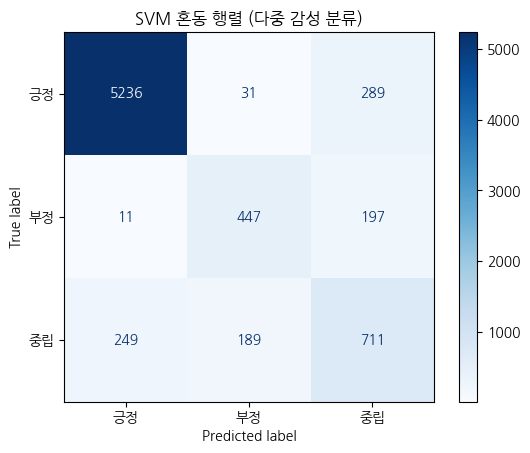

In [29]:

import pandas as pd

df = pd.read_csv("36000_reviews_label.csv", encoding="utf-8-sig")
df = df[['sentence', 'label']].dropna()
df = df[df['label'].isin(['긍정', '부정', '중립'])]  # 3클래스 처리

# ▶ 텍스트와 라벨 분리
X = df['sentence'].fillna('')
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logi = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logi.fit(X_train_vec, y_train)
logi_pred = logi.predict(X_test_vec)

print("📌 Logistic Regression 결과:")
print(classification_report(y_test, logi_pred, digits=3))

from sklearn.svm import LinearSVC

svm = LinearSVC(class_weight='balanced', C=1.0, max_iter=1000)
svm.fit(X_train_vec, y_train)
svm_pred = svm.predict(X_test_vec)

print("📌 SVM 결과:")
print(classification_report(y_test, svm_pred, digits=3))

# ✅ 한글 혼동 행렬 시각화 (다중 클래스 대응)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 실제 사용된 라벨만 추출
unique_labels = sorted(df['label'].unique())
display_labels = unique_labels  # ['부정', '중립', '긍정'] 또는 너의 데이터 순서

# 혼동 행렬 생성 및 시각화
cm = confusion_matrix(y_test, svm_pred, labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM 혼동 행렬 (다중 감성 분류)")
plt.show()



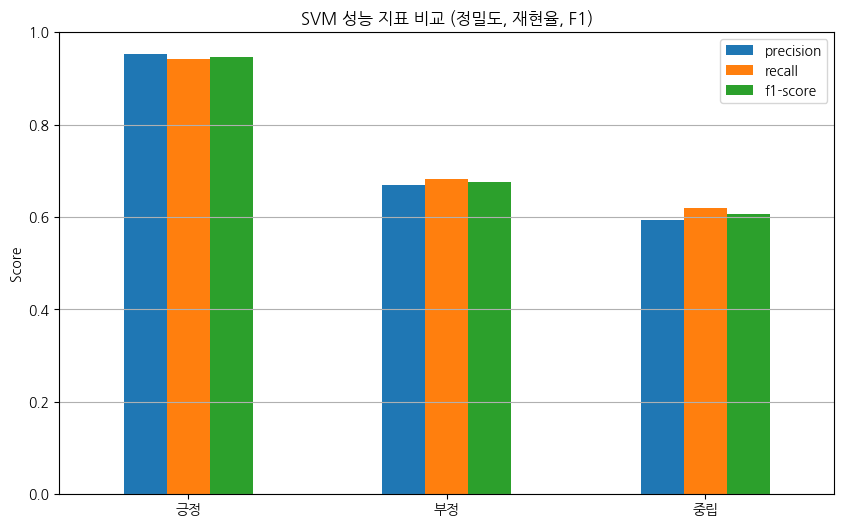

In [30]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# classification_report 결과를 DataFrame으로
report = classification_report(y_test, svm_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-3]  # remove avg rows

# 시각화
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title("SVM 성능 지표 비교 (정밀도, 재현율, F1)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 이진 분류일 때
y_test_bin = label_binarize(y_test, classes=['부정', '긍정'])[:, 0]
y_score = svm.decision_function(X_test_vec)

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'SVM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

ValueError: y should be a 1d array, got an array of shape (7360, 3) instead.

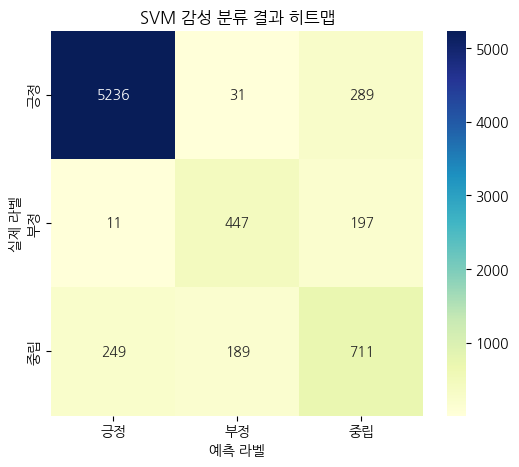

In [33]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svm_pred, labels=unique_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=display_labels, yticklabels=display_labels)
plt.xlabel("예측 라벨")
plt.ylabel("실제 라벨")
plt.title("SVM 감성 분류 결과 히트맵")
plt.show()

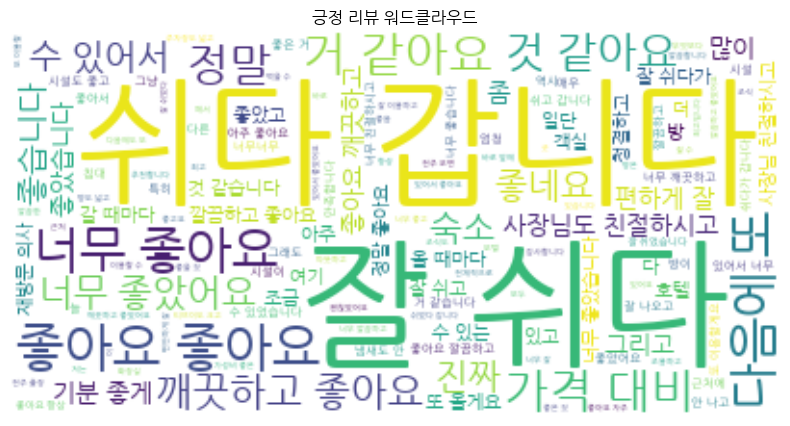

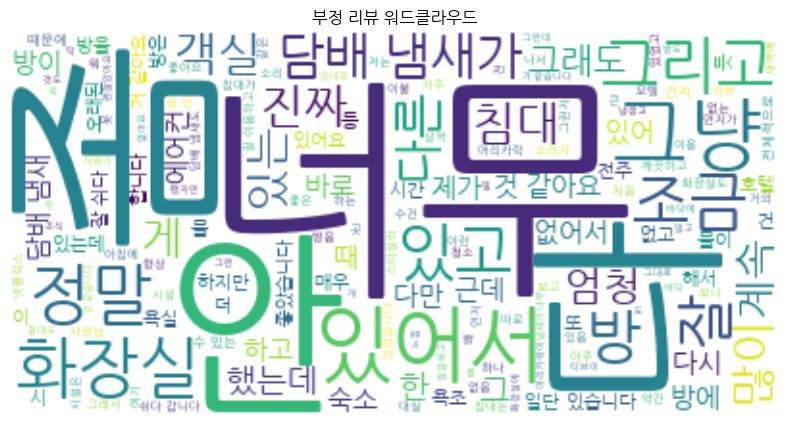

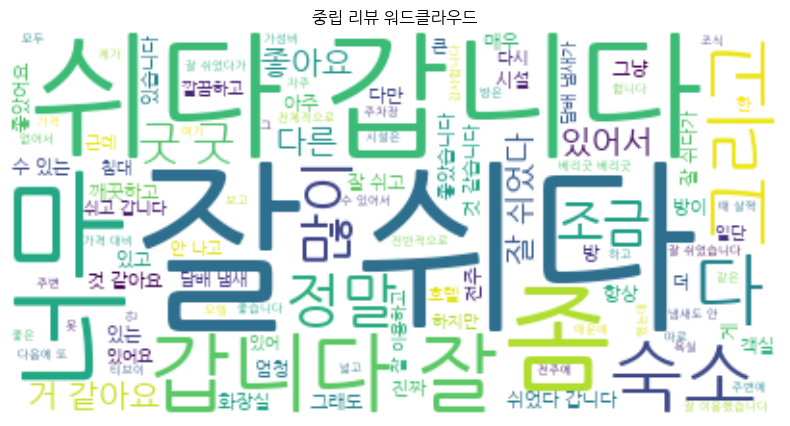

In [34]:
from wordcloud import WordCloud

for label in ['긍정', '부정', '중립']:
    texts = df[df['label'] == label]['sentence'].dropna().str.cat(sep=' ')
    wordcloud = WordCloud(font_path="C:/Windows/Fonts/NanumGothic.ttf", background_color='white').generate(texts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{label} 리뷰 워드클라우드")
    plt.show()

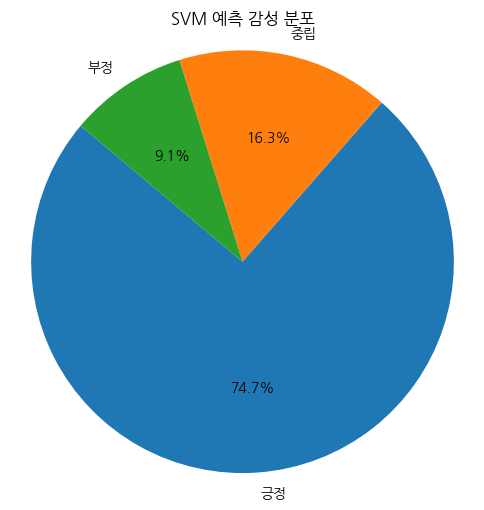

In [35]:
import matplotlib.pyplot as plt

pred_counts = pd.Series(svm_pred).value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("SVM 예측 감성 분포")
plt.axis('equal')
plt.show()

In [ ]:

import pandas as pd

df = pd.read_csv("36000_reviews_label.csv")
df = df[['sentence', 'label']].dropna()
df = df[df['label'].isin(['긍정', '부정','중립'])]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logi = LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
logi.fit(X_train_vec, y_train)
logi_pred = logi.predict(X_test_vec)

print("📌 Logistic Regression 결과:")
print(classification_report(y_test, logi_pred, digits=3))

c:\Users\MYCOM\.conda\envs\azen\lib\site-packages\sklearn\linear_model\_logistic.py:1254: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


📌 Logistic Regression 결과:
              precision    recall  f1-score   support

          긍정      0.994     0.964     0.978      5556
          부정      0.755     0.948     0.840       655

    accuracy                          0.962      6211
   macro avg      0.874     0.956     0.909      6211
weighted avg      0.968     0.962     0.964      6211



In [ ]:

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, y_train)
svm_pred = svm.predict(X_test_vec)

print("📌 SVM 결과:")
print(classification_report(y_test, svm_pred, digits=3))
